1.Task To Do:

• Implement the Logistic Function by completing the code or writing your own function.

• Make sure you pass the test case.

In [1]:
def logistic_function(x):
  """
  Computes the logistic function applied to any value of x.
  Arguments:
  x: scalar or numpy array of any size.
  Returns:
  y: logistic function applied to x.
  """
  import numpy as np
  y = 1 / (1 + np.exp(-x))
  return y

In [2]:
import numpy as np

# Logistic (sigmoid) function
def logistic_function(x):
    """
    Computes the logistic (sigmoid) function.
    Works for scalars and NumPy arrays.
    """
    return 1 / (1 + np.exp(-x))


def test_logistic_function():
    """
    Test cases for the logistic_function.
    """
    x_scalar = 0
    expected_output_scalar = round(1 / (1 + np.exp(0)), 3)  # Expected: 0.5
    assert round(logistic_function(x_scalar), 3) == expected_output_scalar, \
        "Test failed for scalar input"

    x_pos = 2
    expected_output_pos = round(1 / (1 + np.exp(-2)), 3)  # Expected: ~0.881
    assert round(logistic_function(x_pos), 3) == expected_output_pos, \
        "Test failed for positive scalar input"

    x_neg = -3
    expected_output_neg = round(1 / (1 + np.exp(3)), 3)  # Expected: ~0.047
    assert round(logistic_function(x_neg), 3) == expected_output_neg, \
        "Test failed for negative scalar input"

    x_array = np.array([0, 2, -3])
    expected_output_array = np.array([0.5, 0.881, 0.047])

    # Round element-wise and compare arrays
    assert np.all(np.round(logistic_function(x_array), 3) == expected_output_array), \
        "Test failed for NumPy array input"

    print("All tests passed!")

# Run the test case
test_logistic_function()


All tests passed!


2.Task To Do:

• Implement the Log - loss Function by completing the code or writing your own function.

• Make sure you pass the test case.

In [3]:
def log_loss(y_true, y_pred):
    """
    Computes log loss for true target value y ∈ {0, 1}
    and predicted target value y_pred ∈ (0, 1).

    Arguments:
    y_true (scalar): true target value (0 or 1)
    y_pred (scalar): predicted probability (between 0 and 1)

    Returns:
    loss (float): log loss value
    """
    import numpy as np

    # Clip y_pred to avoid log(0)
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)

    # Log loss formula
    loss = - (y_true * np.log(y_pred) +
              (1 - y_true) * np.log(1 - y_pred))

    return loss

In [4]:
# Test function:
y_true, y_pred = 0, 0.1
print(f"log loss({y_true}, {y_pred}) ==> {log_loss(y_true, y_pred)}")
print("+++++++++++++--------------------------++++++++++++++++++++++++")
y_true, y_pred = 1, 0.9
print(f"log loss({y_true}, {y_pred}) ==> {log_loss(y_true, y_pred)}")

log loss(0, 0.1) ==> 0.10536051565782628
+++++++++++++--------------------------++++++++++++++++++++++++
log loss(1, 0.9) ==> 0.10536051565782628


In [5]:
def test_log_loss():
    """
    Test cases for the log_loss function.
    """
    import numpy as np

    y_true = 1
    y_pred = 1
    expected_loss = -np.log(1 - 1e-10)  # due to clipping
    assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-9), \
        "Test failed for perfect prediction (y_true=1, y_pred=1)"

    y_true = 0
    y_pred = 0
    expected_loss = -np.log(1 - 1e-10)
    assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-9), \
        "Test failed for perfect prediction (y_true=0, y_pred=0)"

    y_true = 1
    y_pred = 0
    expected_loss = -np.log(1e-10)
    assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-9), \
        "Test failed for incorrect prediction (y_true=1, y_pred=0)"

    y_true = 0
    y_pred = 1
    expected_loss = -np.log(1e-10)
    assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-9), \
        "Test failed for incorrect prediction (y_true=0, y_pred=1)"

    y_true = 1
    y_pred = 0.8
    expected_loss = -np.log(0.8)
    assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-6), \
        "Test failed for partial prediction (y_true=1, y_pred=0.8)"

    y_true = 0
    y_pred = 0.2
    expected_loss = -np.log(0.8)
    assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-6), \
        "Test failed for partial prediction (y_true=0, y_pred=0.2)"

    print("All tests passed!")


# Run the test
test_log_loss()


All tests passed!


3.Task To Do:

• Implement the Cost Function by completing the code or writing your own function.

• Make sure you pass the test case.

In [6]:
def cost_function(y_true, y_pred):
    """
    Computes log loss for inputs true value (0 or 1) and predicted value (between 0 and 1)

    Args:
    y_true (array_like, shape (n,)): array of true values (0 or 1)
    y_pred (array_like, shape (n,)): array of predicted values (probability of y_pred being 1)

    Returns:
    cost (float): nonnegative cost corresponding to y_true and y_pred
    """
    import numpy as np

    assert len(y_true) == len(y_pred), \
        "Length of true values and length of predicted values do not match"

    # Number of samples
    n = len(y_true)

    # Clip predictions to avoid log(0)
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)

    # Vector of log losses
    loss_vec = - (y_true * np.log(y_pred) +
                  (1 - y_true) * np.log(1 - y_pred))

    # Average cost
    cost = np.sum(loss_vec) / n

    return cost


In [7]:
import numpy as np

def test_cost_function():
    # Test case 1: Simple example with known expected cost
    y_true = np.array([1, 0, 1])
    y_pred = np.array([0.9, 0.1, 0.8])

    # Manually computed expected cost
    expected_cost = (
        -np.log(0.9)          # y=1
        -np.log(1 - 0.1)      # y=0
        -np.log(0.8)          # y=1
    ) / 3

    # Call the cost function
    result = cost_function(y_true, y_pred)

    # Check if result is close to expected value
    assert np.isclose(result, expected_cost, atol=1e-6), \
        f"Test failed: {result} != {expected_cost}"

    print("Test passed for simple case!")


# Run the test
test_cost_function()


Test passed for simple case!


4.Task To Do:

• Implement the vectorized cost function costfunction logreg Function by completing the code or writing your own function.

• Make sure you pass the test case.

In [8]:
import numpy as np

# Function to compute cost function in terms of model parameters - using vectorization
def costfunction_logreg(X, y, w, b):
    """
    Computes the cost function, given data and model parameters.
    Args:
    X (ndarray, shape (m,n)): data on features, m observations with n features.
    y (array_like, shape (m,)): array of true values of target (0 or 1).
    w (array_like, shape (n,)): weight parameters of the model.
    b (float): bias parameter of the model.
    Returns:
    cost (float): nonnegative cost corresponding to y and y_pred.
    """
    n, d = X.shape
    assert len(y) == n, "Number of feature observations and number of target observations do not match."
    assert len(w) == d, "Number of features and number of weight parameters do not match."

    # Compute linear combination
    z = np.dot(X, w) + b

    # Sigmoid (logistic) function
    y_pred = 1 / (1 + np.exp(-z))

    # Compute cost
    cost = cost_function(y, y_pred)

    return cost

X = np.array([[10, 20], [-10, 10]])
y = np.array([1, 0])
w = np.array([0.5, 1.5])
b = 1

print(
    f"cost for logistic regression(X={X}, y={y}, w={w}, b={b}) = "
    f"{costfunction_logreg(X, y, w, b)}"
)


cost for logistic regression(X=[[ 10  20]
 [-10  10]], y=[1 0], w=[0.5 1.5], b=1) = 5.500008350834906


5.Task To Do:

• Implement the compute gradient Function by completing the code or writing your own function.

• Make sure you pass the test case.

In [9]:
def compute_gradient(X, y, w, b):
    """
    Computes gradients of the cost function with respect to model parameters.

    Args:
    X (ndarray, shape (n,d)): Input data, n observations with d features
    y (array_like, shape (n,)): True labels (0 or 1)
    w (array_like, shape (d,)): Weight parameters of the model
    b (float): Bias parameter of the model

    Returns:
    grad_w (array_like, shape (d,)): Gradient w.r.t. weights
    grad_b (float): Gradient w.r.t. bias
    """
    import numpy as np

    n, d = X.shape
    assert len(y) == n, f"Expected y to have {n} elements, but got {len(y)}"
    assert len(w) == d, f"Expected w to have {d} elements, but got {len(w)}"

    z = np.dot(X, w) + b
    y_pred = 1 / (1 + np.exp(-z))   # sigmoid

    error = y_pred - y               # shape (n,)

    grad_w = np.dot(X.T, error) / n  # shape (d,)
    grad_b = np.sum(error) / n       # scalar

    return grad_w, grad_b


In [10]:
import numpy as np

# Simple test case
X = np.array([[10, 20], [-10, 10]])  # shape (2, 2)
y = np.array([1, 0])                 # shape (2,)
w = np.array([0.5, 1.5])             # shape (2,)
b = 1                                # scalar

# Assertion tests
try:
    grad_w, grad_b = compute_gradient(X, y, w, b)
    print("Gradients computed successfully.")
    print(f"grad_w: {grad_w}")
    print(f"grad_b: {grad_b}")
except AssertionError as e:
    print(f"Assertion error: {e}")


Gradients computed successfully.
grad_w: [-4.99991649  4.99991649]
grad_b: 0.4999916492890759


6.Task To Do:

• Implement the gradient descent Function by completing the code or writing your own function.

• Make sure you pass the test case.

In [11]:
import numpy as np

def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=True):
    """
    Implements batch gradient descent to optimize logistic regression parameters.
    """
    n, d = X.shape
    assert len(y) == n, "Number of observations in X and y do not match"
    assert len(w) == d, "Number of features in X and w do not match"

    cost_history = []
    params_history = []

    for i in range(n_iter):
        # Compute gradients
        grad_w, grad_b = compute_gradient(X, y, w, b)

        # Update weights and bias
        w -= alpha * grad_w
        b -= alpha * grad_b

        # Compute cost
        cost = costfunction_logreg(X, y, w, b)

        # Store cost and parameters
        cost_history.append(cost)
        params_history.append((w.copy(), b))

        # Optionally print cost and parameters
        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")

        if show_params and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: w = {w}, b = {b:.6f}")

    return w, b, cost_history, params_history
# Sample data
X = np.array([[0.1, 0.2], [-0.1, 0.1]])  # Shape (2, 2)
y = np.array([1, 0])                     # Shape (2,)
w = np.zeros(X.shape[1])                 # Initial weights
b = 0.0                                  # Initial bias
alpha = 0.1                              # Learning rate
n_iter = 1000                            # Number of iterations (smaller for demo)

# Run gradient descent
w_out, b_out, cost_history, params_history = gradient_descent(
    X, y, w, b, alpha, n_iter, show_cost=True, show_params=False
)

# Print final parameters and cost
print("\nFinal parameters:")
print(f"w: {w_out}, b: {b_out}")
print(f"Final cost: {cost_history[-1]:.6f}")


Iteration 0: Cost = 0.692835
Iteration 100: Cost = 0.662662
Iteration 200: Cost = 0.634332
Iteration 300: Cost = 0.607704
Iteration 400: Cost = 0.582671
Iteration 500: Cost = 0.559128
Iteration 600: Cost = 0.536977
Iteration 700: Cost = 0.516126
Iteration 800: Cost = 0.496487
Iteration 900: Cost = 0.477978
Iteration 999: Cost = 0.460693

Final parameters:
w: [4.30539485 2.10704574], b: -0.30434456824754946
Final cost: 0.460693


In [12]:
import numpy as np

def test_gradient_descent():
    X = np.array([[0.1, 0.2], [-0.1, 0.1]])  # Shape (2, 2)
    y = np.array([1, 0])                     # Shape (2,)
    w = np.zeros(X.shape[1])                 # Initial weights
    b = 0.0                                  # Initial bias
    alpha = 0.1                              # Learning rate
    n_iter = 100                             # Number of iterations

    # Run gradient descent
    w_out, b_out, cost_history, _ = gradient_descent(
        X, y, w, b, alpha, n_iter, show_cost=False, show_params=False
    )

    assert len(cost_history) == n_iter, "Cost history length does not match the number of iterations"
    assert w_out.shape == w.shape, "Shape of output weights does not match the initial weights"
    assert isinstance(b_out, float), "Bias output is not a float"
    assert cost_history[-1] < cost_history[0], "Cost did not decrease over iterations"

    print("All tests passed!")

# Run the test
test_gradient_descent()


All tests passed!


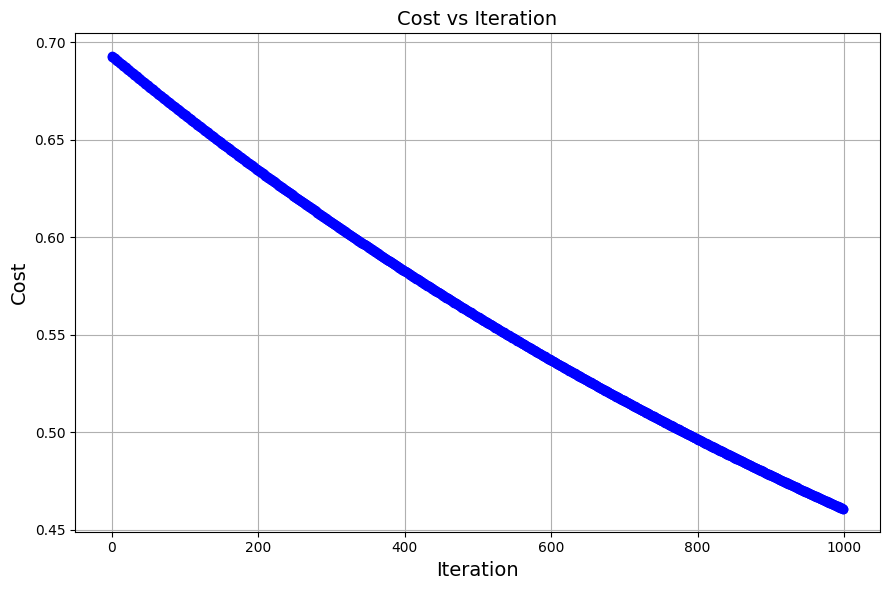

In [13]:
import matplotlib.pyplot as plt
# Assuming cost_history exists from your gradient descent run
plt.figure(figsize=(9, 6))
plt.plot(cost_history, marker='o', linestyle='-', color='b')  # Optional: add markers for clarity
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration", fontsize=14)
plt.grid(True)  # Optional: show grid for better readability
plt.tight_layout()
plt.show()


7.Task To Do:

• Implement the prediction Function by completing the code or writing your own function.

• Make sure you pass the test case.

In [14]:
import numpy as np

def prediction(X, w, b, threshold=0.5):
    """
    Predicts binary outcomes for given input features based on logistic regression parameters.

    Arguments:
    X (ndarray, shape (n,d)): Array of test features, n samples and d features.
    w (ndarray, shape (d,)): Array of learned weights.
    b (float): Learned bias.
    threshold (float, optional): Classification threshold. Default is 0.5.

    Returns:
    y_pred (ndarray, shape (n,)): Array of predicted binary class labels (0 or 1).
    """
    # Compute linear combination
    z = np.dot(X, w) + b

    # Apply sigmoid to get predicted probabilities
    y_test_prob = 1 / (1 + np.exp(-z))

    # Apply threshold to get binary predictions
    y_pred = (y_test_prob >= threshold).astype(int)

    return y_pred


In [15]:
import numpy as np

def test_prediction():
    X_test = np.array([[0.5, 1.0], [1.5, -0.5], [-0.5, -1.0]])
    w_test = np.array([1.0, -1.0])
    b_test = 0.0
    threshold = 0.5

    expected_output = np.array([0, 1, 1])

    # Call prediction function
    y_pred = prediction(X_test, w_test, b_test, threshold)

    # Assert equality
    assert np.array_equal(y_pred, expected_output), f"Expected {expected_output}, but got {y_pred}"

    print("Test passed!")

# Run the test
test_prediction()


Test passed!


8.Task To Do:

• Implement evaluate classification Function by completing the code or writing your own function.

• Make sure you pass the test case.

In [16]:
import numpy as np

def evaluate_classification(y_true, y_pred):
    """
    Computes the confusion matrix, precision, recall, and F1-score for binary classification.

    Arguments:
    y_true (ndarray, shape (n,)): Ground truth binary labels (0 or 1)
    y_pred (ndarray, shape (n,)): Predicted binary labels (0 or 1)

    Returns:
    metrics (dict): Dictionary containing confusion matrix, precision, recall, and F1-score
    """
    # Confusion matrix components
    TP = np.sum((y_true == 1) & (y_pred == 1))  # True Positives
    TN = np.sum((y_true == 0) & (y_pred == 0))  # True Negatives
    FP = np.sum((y_true == 0) & (y_pred == 1))  # False Positives
    FN = np.sum((y_true == 1) & (y_pred == 0))  # False Negatives

    # Confusion matrix
    confusion_matrix = np.array([[TN, FP],
                                 [FN, TP]])

    # Precision, recall, and F1-score
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

    # Metrics dictionary
    metrics = {
        "confusion_matrix": confusion_matrix,
        "precision": precision,
        "recall": recall,
        "f1_score": f1_score
    }

    return metrics


3.2 Putting Helper Function to Action - Sigmoid Regression for the dataset:
Dataset Used: "pima-indians-diabetes.data.csv"

1. Some Basic Data Operation, Loading, Analysis and Cleaning:

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# URL for Pima Indians Diabetes dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

# Corrected column names (using standard quotes)
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
           'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Load dataset
data_pima_diabetes = pd.read_csv(url, names=columns)

# Quick check
print(data_pima_diabetes.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [18]:
# Data cleaning
columns_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data_pima_diabetes[columns_to_clean] = data_pima_diabetes[columns_to_clean].replace(0, np.nan)
data_pima_diabetes.fillna(data_pima_diabetes.median(), inplace=True)
data_pima_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [19]:
data_pima_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


2. Train Test Split and Standard Scaling of the Data:

In [20]:
# Train-test split
X = data_pima_diabetes.drop(columns=['Outcome']).values
y = data_pima_diabetes['Outcome'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

3. Training of the Sigmoid Regression:


Training Logistic Regression Model:
Iteration 0: Cost = 0.676575
Iteration 100: Cost = 0.465441
Iteration 200: Cost = 0.455913
Iteration 300: Cost = 0.453874
Iteration 400: Cost = 0.453316
Iteration 500: Cost = 0.453148
Iteration 600: Cost = 0.453096
Iteration 700: Cost = 0.453079
Iteration 800: Cost = 0.453074
Iteration 900: Cost = 0.453072
Iteration 999: Cost = 0.453071


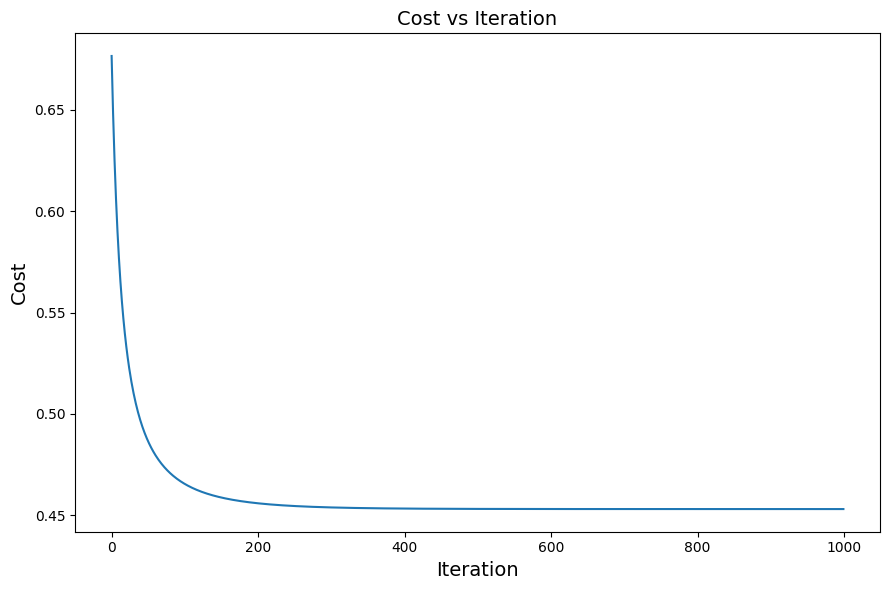

In [21]:
# Initialize parameters
w = np.zeros(X_train_scaled.shape[1])
b = 0.0
alpha = 0.1
n_iter = 1000
# Train model
print("\nTraining Logistic Regression Model:")
w, b, cost_history,params_history = gradient_descent(X_train_scaled, y_train, w, b, alpha, n_iter, show_cost=True, show_params=False)
# Plot cost history
plt.figure(figsize=(9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration", fontsize=14)
plt.tight_layout()
plt.show()

4. Did the Model Overfitt or Underfitt?

In [22]:
# Test model
y_train_pred = prediction(X_train_scaled, w, b)
y_test_pred = prediction(X_test_scaled, w, b)
# Evaluate train and test performance
train_cost = costfunction_logreg(X_train_scaled, y_train, w, b)
test_cost = costfunction_logreg(X_test_scaled, y_test, w, b)
print(f"\nTrain Loss (Cost): {train_cost:.4f}")
print(f"Test Loss (Cost): {test_cost:.4f}")


Train Loss (Cost): 0.4531
Test Loss (Cost): 0.5146


5. How well my model did?


Test Accuracy: 70.78%

Confusion Matrix:
[[82 18]
 [27 27]]
Precision: 0.60
Recall: 0.50
F1-Score: 0.55


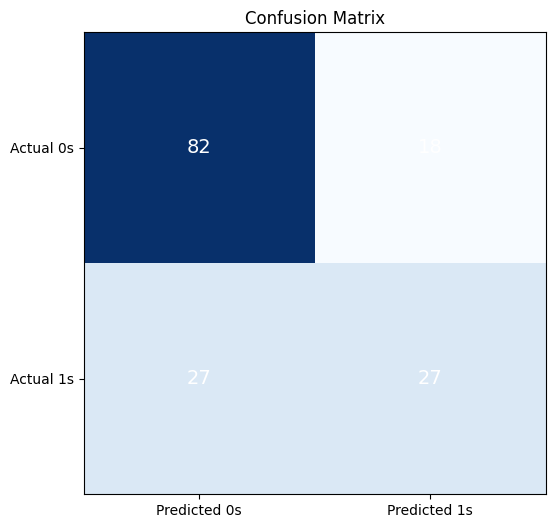

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test_pred exists from your prediction function

# Accuracy
test_accuracy = np.mean(y_test_pred == y_test) * 100
print(f"\nTest Accuracy: {test_accuracy:.2f}%")

# Evaluation using your metrics function
metrics = evaluate_classification(y_test, y_test_pred)
confusion_matrix = metrics["confusion_matrix"]
precision = metrics["precision"]
recall = metrics["recall"]
f1_score = metrics["f1_score"]

print(f"\nConfusion Matrix:\n{confusion_matrix}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")

# Optional: Visualize Confusion Matrix
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(confusion_matrix, cmap='Blues')
ax.grid(False)

# Set axis labels
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Predicted 0s', 'Predicted 1s'])
ax.set_yticklabels(['Actual 0s', 'Actual 1s'])
ax.set_ylim(1.5, -0.5)  # Fix for matplotlib y-axis display issue

# Add numbers in each cell
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='white', fontsize=14)

plt.title("Confusion Matrix")
plt.show()


1.Task To Do:

• Implement the softmax Function by completing the code or writing your own function.

• Make sure you pass the test case.

In [24]:
import numpy as np

def softmax(z):
    """
    Compute the softmax of a 2D numpy array along rows (samples).

    Parameters:
    z (numpy.ndarray): Input array of shape (m, n) where m is the number of samples
                       and n is the number of classes.

    Returns:
    numpy.ndarray: Softmax probabilities of the same shape as input (m, n),
                   where each row sums to 1 and represents the probability distribution
                   over classes for a sample.

    Notes:
    - Applies a normalization trick to prevent numerical instability by subtracting
      the max value in each row before exponentiation.
    """
    # Numerical stability: subtract max per row
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    # Softmax probabilities
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)


In [25]:
import numpy as np

def test_softmax():
    """
    Perform basic assertion tests on the softmax function to validate its correctness.

    Tests:
    - Ensure that the output probabilities sum to 1 for each row.
    - Ensure non-negative values (all probabilities should be >= 0).
    - Test on edge cases (all zeros, very large or small values, mixed positives/negatives).
    """
    # Test input cases
    test_cases = [
        (np.array([[0, 0, 0]]), "All zeros"),
        (np.array([[1, 2, 3]]), "Simple case"),
        (np.array([[1000, 1000, 1000]]), "Large identical values"),
        (np.array([[-1000, -1000, -1000]]), "Small identical values"),
        (np.array([[1, 0, -1]]), "Mixed positive and negative")
    ]

    for i, (z, description) in enumerate(test_cases):
        print(f"Test {i + 1}: {description}")
        result = softmax(z)

        # Check that probabilities sum to 1
        assert np.allclose(result.sum(axis=1), 1), f"Failed: Probabilities do not sum to 1 in {description}"

        # Check non-negativity
        assert np.all(result >= 0), f"Failed: Negative probabilities in {description}"

        print("Passed.")

    print("All tests passed for softmax function.")

# Run the test
test_softmax()


Test 1: All zeros
Passed.
Test 2: Simple case
Passed.
Test 3: Large identical values
Passed.
Test 4: Small identical values
Passed.
Test 5: Mixed positive and negative
Passed.
All tests passed for softmax function.


2.Task To Do:

• Implement the loss softmax Function by completing the code or writing your own function.

• Make sure you pass the test case.

In [26]:
import numpy as np

def loss_softmax(y_true, y_pred):
    """
    Compute the cross-entropy loss for a single observation.

    Parameters:
    y_true (numpy.ndarray): True labels (one-hot encoded) of shape (c,)
    y_pred (numpy.ndarray): Predicted probabilities of shape (c,)

    Returns:
    float: Cross-entropy loss for the observation.
    """
    # Add small epsilon to prevent log(0)
    epsilon = 1e-10
    return -np.sum(y_true * np.log(y_pred + epsilon))


In [27]:
import numpy as np

def test_loss_softmax():
    """
    Test the loss_softmax function using known inputs and expected outputs.
    """

    # Test Case 1: Perfect prediction
    y_true = np.array([0, 1, 0])
    y_pred = np.array([0.1, 0.8, 0.1])
    expected_loss = -np.log(0.8)
    assert np.isclose(loss_softmax(y_true, y_pred), expected_loss), "Test Case 1 Failed"

    # Test Case 2: Incorrect prediction
    y_true = np.array([1, 0, 0])
    y_pred = np.array([0.3, 0.4, 0.3])
    expected_loss = -np.log(0.3)
    assert np.isclose(loss_softmax(y_true, y_pred), expected_loss), "Test Case 2 Failed"

    # Test Case 3: Edge case with near-one probability
    y_true = np.array([0, 1, 0])
    y_pred = np.array([0.01, 0.98, 0.01])
    expected_loss = -np.log(0.98)
    assert np.isclose(loss_softmax(y_true, y_pred), expected_loss), "Test Case 3 Failed"

    print("All test cases passed!")

# Run the test
test_loss_softmax()


All test cases passed!


3.Task To Do:

• Implement the cost softmax Function by completing the code or writing your own function.

• Make sure you pass the test case.

In [28]:
import numpy as np

def cost_softmax(X, y, W, b):
    """
    Compute the average cross-entropy cost over all samples for softmax regression.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d)
    y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c)
    W (numpy.ndarray): Weight matrix of shape (d, c)
    b (numpy.ndarray): Bias vector of shape (c,)

    Returns:
    float: Average cross-entropy cost over all samples
    """
    n, d = X.shape
    # Compute logits
    z = np.dot(X, W) + b
    # Compute softmax probabilities
    y_pred = softmax(z)
    # Compute average cross-entropy loss
    return -np.sum(y * np.log(y_pred + 1e-10)) / n


In [29]:
import numpy as np

def test_cost_softmax():
    """
    Test the cost_softmax function using known inputs and outputs.
    """

    # Test Case 1: Small dataset with specific weights
    X = np.array([[1, 2],
                  [2, 3],
                  [3, 4]])  # Feature matrix (n=3, d=2)
    y = np.array([[1, 0],
                  [0, 1],
                  [1, 0]])  # True labels (one-hot, n=3, c=2)
    W = np.array([[1, -1],
                  [-1, 1]])  # Weight matrix (d=2, c=2)
    b = np.array([0, 0])     # Bias vector (c=2)

    z = np.dot(X, W) + b
    y_pred = softmax(z)
    expected_cost = -np.sum(y * np.log(y_pred + 1e-10)) / X.shape[0]
    assert np.isclose(cost_softmax(X, y, W, b), expected_cost), "Test Case 1 Failed"

    # Test Case 2: All-zero weights and bias
    X = np.array([[1, 0],
                  [0, 1],
                  [1, 1]])  # Feature matrix (n=3, d=2)
    y = np.array([[1, 0],
                  [0, 1],
                  [1, 0]])  # True labels (one-hot, n=3, c=2)
    W = np.zeros((2, 2))      # Zero weight matrix
    b = np.zeros(2)            # Zero bias vector

    z = np.dot(X, W) + b
    y_pred = softmax(z)        # Predicted probabilities (uniform)
    expected_cost = -np.sum(y * np.log(y_pred + 1e-10)) / X.shape[0]
    assert np.isclose(cost_softmax(X, y, W, b), expected_cost), "Test Case 2 Failed"

    print("All test cases passed!")

# Run the test
test_cost_softmax()


All test cases passed!


4.Implementing Gradient Descent for Training Softmax Regression:

4.1 Gradients for Softmax Regression:

In [30]:
import numpy as np

def compute_gradient_softmax(X, y, W, b):
    """
    Compute the gradients of the cost function with respect to weights and biases
    for softmax regression.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d)
    y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c)
    W (numpy.ndarray): Weight matrix of shape (d, c)
    b (numpy.ndarray): Bias vector of shape (c,)

    Returns:
    tuple:
        grad_W (numpy.ndarray): Gradient w.r.t weights, shape (d, c)
        grad_b (numpy.ndarray): Gradient w.r.t biases, shape (c,)
    """
    n, d = X.shape
    # Compute logits
    z = np.dot(X, W) + b
    # Compute softmax probabilities
    y_pred = softmax(z)
    # Compute gradients
    grad_W = np.dot(X.T, (y_pred - y)) / n
    grad_b = np.sum(y_pred - y, axis=0) / n
    return grad_W, grad_b


In [31]:
import numpy as np

def test_compute_gradient_softmax():
    """
    Test the compute_gradient_softmax function using a simple example.
    """
    # Define simple inputs
    X = np.array([[1, 2],
                  [3, 4]])              # Shape (2, 2)
    y = np.array([[1, 0],
                  [0, 1]])              # Shape (2, 2), one-hot encoded
    W = np.array([[0.1, 0.2],
                  [0.3, 0.4]])          # Shape (2, 2)
    b = np.array([0.01, 0.02])           # Shape (2,)

    # Expected gradients (manual calculation or reference)
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    grad_W_expected = np.dot(X.T, (y_pred - y)) / X.shape[0]
    grad_b_expected = np.sum(y_pred - y, axis=0) / X.shape[0]

    # Compute gradients using the function
    grad_W, grad_b = compute_gradient_softmax(X, y, W, b)

    # Assertions
    assert np.allclose(grad_W, grad_W_expected, atol=1e-6), "Gradient W does not match expected values"
    assert np.allclose(grad_b, grad_b_expected, atol=1e-6), "Gradient b does not match expected values"

    print("All tests passed for compute_gradient_softmax!")

# Run the test
test_compute_gradient_softmax()


All tests passed for compute_gradient_softmax!


4.2 Gradient Descent for Softmax Regression:

In [32]:
import numpy as np

def gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False):
    """
    Perform gradient descent to optimize weights and biases for softmax regression.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d)
    y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c)
    W (numpy.ndarray): Weight matrix of shape (d, c)
    b (numpy.ndarray): Bias vector of shape (c,)
    alpha (float): Learning rate
    n_iter (int): Number of iterations
    show_cost (bool): Whether to display the cost every 100 iterations

    Returns:
    tuple: Optimized weights (d, c), biases (c,), and cost history (list)
    """
    cost_history = []

    for i in range(n_iter):
        # Compute gradients
        grad_W, grad_b = compute_gradient_softmax(X, y, W, b)
        # Update weights and biases
        W -= alpha * grad_W
        b -= alpha * grad_b
        # Compute current cost
        cost = cost_softmax(X, y, W, b)
        cost_history.append(cost)

        # Optionally print cost
        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")

    return W, b, cost_history

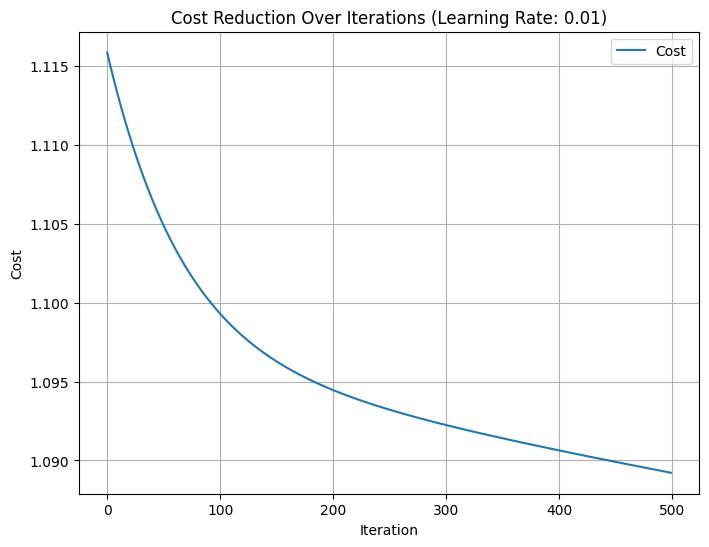

Initial Cost: 1.115861
Final Cost: 1.089223


In [33]:
import numpy as np
import matplotlib.pyplot as plt

def test_gradient_descent_softmax_with_plot():
    # Generate synthetic data
    np.random.seed(0)
    n, d, c = 100, 5, 3  # 100 samples, 5 features, 3 classes
    X = np.random.rand(n, d)
    y_indices = np.random.randint(0, c, size=n)
    y = np.zeros((n, c))
    y[np.arange(n), y_indices] = 1  # One-hot encoding

    # Initialize weights and biases
    W = np.random.rand(d, c)
    b = np.random.rand(c)

    # Gradient descent parameters
    alpha = 0.01  # Learning rate
    n_iter = 500  # Number of iterations

    # Run gradient descent
    W_opt, b_opt, cost_history = gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False)

    # Plot cost history
    plt.figure(figsize=(8, 6))
    plt.plot(range(n_iter), cost_history, label="Cost")
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.title(f"Cost Reduction Over Iterations (Learning Rate: {alpha})")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print initial and final costs
    print(f"Initial Cost: {cost_history[0]:.6f}")
    print(f"Final Cost: {cost_history[-1]:.6f}")

# Run the test
test_gradient_descent_softmax_with_plot()


5.Decision/Prediction Function for Softmax Regression for Multi-class Classification:

We perform two tasks in this step: predicting probabilities using the trained model and classifying them into discrete classes based on the maximum probability.

In [34]:
import numpy as np

def predict_softmax(X, W, b):
    """
    Predict the class labels for input data using softmax regression.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d)
    W (numpy.ndarray): Weight matrix of shape (d, c)
    b (numpy.ndarray): Bias vector of shape (c,)

    Returns:
    numpy.ndarray: Predicted class labels of shape (n,)
    """
    # Compute logits
    z = np.dot(X, W) + b
    # Compute probabilities using softmax
    y_pred = softmax(z)
    # Return the index of the maximum probability as the predicted class
    return np.argmax(y_pred, axis=1)


In [35]:
import numpy as np

def test_predict_softmax():
    """
    Test the predict_softmax function with synthetic data.
    """
    # Generate synthetic data
    np.random.seed(0)
    n, d, c = 10, 5, 3  # 10 samples, 5 features, 3 classes
    X = np.random.rand(n, d)
    W = np.random.rand(d, c)
    b = np.random.rand(c)

    # Compute the predictions
    predictions = predict_softmax(X, W, b)

    # Check the shape of the output
    assert predictions.shape == (n,), f"Shape mismatch: expected {(n,)}, got {predictions.shape}"

    # Verify predicted labels are within the range of class indices
    assert np.all(predictions >= 0) and np.all(predictions < c), (
        f"Predictions out of range: expected 0 to {c-1}, got {predictions}"
    )

    # Check that the predicted labels are integers
    assert np.issubdtype(predictions.dtype, np.integer), f"Predictions are not integers: {predictions.dtype}"

    print("All tests passed for predict_softmax!")

# Run the test
test_predict_softmax()


All tests passed for predict_softmax!


7.Evaluating Classifier:

In [36]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

def evaluate_classification(y_true, y_pred):
    """
    Evaluate classification performance for multi-class problems.

    Parameters:
    y_true (numpy.ndarray): True class labels of shape (n,)
    y_pred (numpy.ndarray): Predicted class labels of shape (n,)

    Returns:
    tuple:
        cm (numpy.ndarray): Confusion matrix of shape (num_classes, num_classes)
        precision (float): Weighted precision across all classes
        recall (float): Weighted recall across all classes
        f1 (float): Weighted F1-score across all classes
    """
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Weighted metrics
    precision = precision_score(y_true, y_pred, average="weighted", zero_division=0)
    recall = recall_score(y_true, y_pred, average="weighted", zero_division=0)
    f1 = f1_score(y_true, y_pred, average="weighted", zero_division=0)

    return cm, precision, recall, f1


1.Some Basic Data Operation, Loading, Analysis and Cleaning:

In [37]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="target")
# Display information about the dataset before cleaning
print("Dataset Info:")
X.info()
print("\nDataset Description Before Cleaning:")
X.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB

Dataset Description Before Cleaning:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


2.Constructing One Hot Encoding for Label Vector:

In [38]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Load Iris dataset
iris = load_iris()
X = iris.data  # Feature matrix (n_samples, n_features)
y = iris.target  # Target vector (n_samples,)

# Initialize one-hot encoder
encoder = OneHotEncoder(sparse_output=False)  # Use sparse_output=False to get dense array

# Reshape y to a 2D array and fit_transform
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

print("Original target vector (first 10):", y[:10])
print("One-hot encoded target (first 10 rows):\n", y_onehot[:10])


Original target vector (first 10): [0 0 0 0 0 0 0 0 0 0]
One-hot encoded target (first 10 rows):
 [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


3.Train Test Split and Standard Scaling of the Data:

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_onehot, test_size=0.2, random_state=42, stratify=y
)

# Initialize the scaler and scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Assertions to verify shapes
assert X_train_scaled.shape == (X_train.shape[0], X_train.shape[1]), (
    f"X_train_scaled shape mismatch: {X_train_scaled.shape}"
)
assert X_test_scaled.shape == (X_test.shape[0], X_test.shape[1]), (
    f"X_test_scaled shape mismatch: {X_test_scaled.shape}"
)

print("Shape assertions passed!")


Shape assertions passed!


4.Training of the Softmax Regression:


Training Softmax Regression Model:
Iteration 0: Cost = 1.006823
Iteration 100: Cost = 0.319428
Iteration 200: Cost = 0.251376
Iteration 300: Cost = 0.211741
Iteration 400: Cost = 0.185004
Iteration 500: Cost = 0.165744
Iteration 600: Cost = 0.151226
Iteration 700: Cost = 0.139898
Iteration 800: Cost = 0.130812
Iteration 900: Cost = 0.123360
Iteration 999: Cost = 0.117192


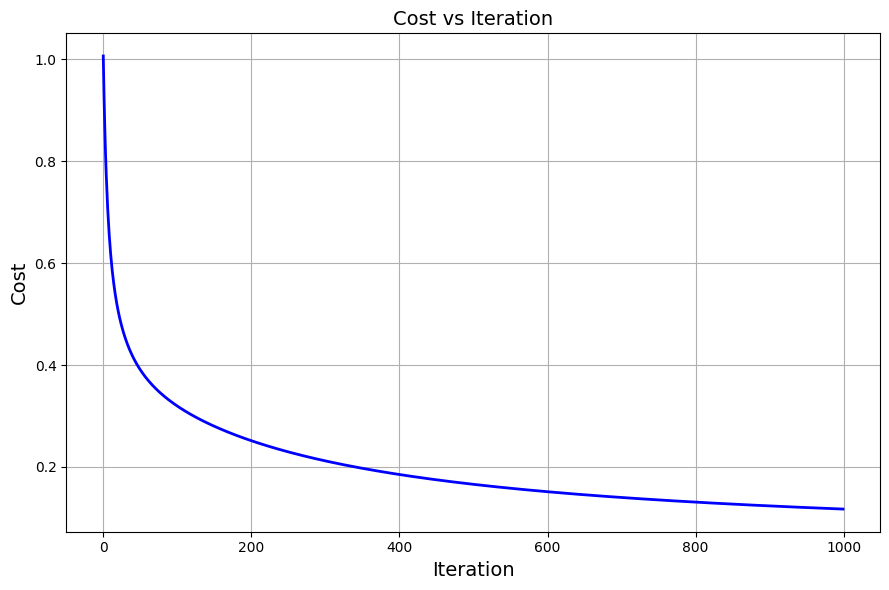

In [40]:
import matplotlib.pyplot as plt

# Initializations
num_classes = y_train.shape[1]       # Number of classes
num_features = X_train_scaled.shape[1]  # Number of features
W = np.zeros((num_features, num_classes))  # Weight matrix
b = np.zeros(num_classes)                  # Bias vector
alpha = 0.1                                # Learning rate
n_iter = 1000                              # Number of iterations

print("\nTraining Softmax Regression Model:")

# Train the model using gradient descent
W, b, cost_history = gradient_descent_softmax(
    X_train_scaled, y_train, W, b, alpha, n_iter, show_cost=True
)

# Plot Cost vs. Iterations
plt.figure(figsize=(9, 6))
plt.plot(cost_history, color='blue', linewidth=2)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


4.Did the Model Overfitt or Underfitt?

In [41]:
# Test model
y_train_pred = predict_softmax(X_train_scaled, W, b)
y_test_pred = predict_softmax(X_test_scaled, W, b)
# Evaluate train and test performance
train_cost = cost_softmax(X_train_scaled, y_train, W, b)
test_cost = cost_softmax(X_test_scaled, y_test, W, b)
print(f"\nTrain Loss (Cost): {train_cost:.4f}")
print(f"Test Loss (Cost): {test_cost:.4f}")


Train Loss (Cost): 0.1172
Test Loss (Cost): 0.1575


5.How well my model did?


Test Accuracy: 93.33%

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
Precision: 0.93
Recall: 0.93
F1-Score: 0.93


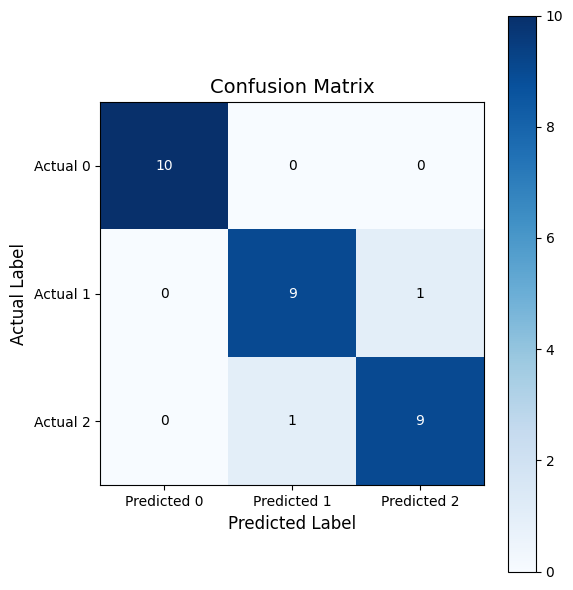

In [42]:
# Predict class labels for test set
y_test_pred = predict_softmax(X_test_scaled, W, b)  # shape (n_test,)

# Compute test accuracy
y_test_true = np.argmax(y_test, axis=1)  # Convert one-hot to class labels
test_accuracy = np.mean(y_test_pred == y_test_true) * 100
print(f"\nTest Accuracy: {test_accuracy:.2f}%")

# Evaluate classification metrics
cm, precision, recall, f1 = evaluate_classification(y_test_true, y_test_pred)
print("\nConfusion Matrix:")
print(cm)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Visualize the confusion matrix
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 6))
cax = ax.imshow(cm, cmap='Blues')  # Use a color map

# Set tick labels
ax.set_xticks(range(cm.shape[0]))
ax.set_yticks(range(cm.shape[0]))
ax.set_xticklabels([f'Predicted {i}' for i in range(cm.shape[0])])
ax.set_yticklabels([f'Actual {i}' for i in range(cm.shape[0])])

# Add numbers inside the cells
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j],
                ha='center', va='center',
                color='white' if cm[i, j] > np.max(cm) / 2 else 'black')

ax.grid(False)
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)
plt.colorbar(cax)
plt.tight_layout()
plt.show()
